# Лекция 1

## Конечно-разностные схемы. 
## Часть 1


&nbsp; Первым направлением, в котором мы будем двигаться в рамках данного курса, будет изучение конечно-разностных методов решения уравнений в частных производных, основанных на конечно-разностном приближении производных. Методы данного класса достаточно просты в реализации и позволяют наглядно продемонстировать ключевые понятия численных подходов к решению уравнений в частных производных. Несмотря на свою простоту конечно-разностные методы до сих пор находят свое применение при решении широкого класса задач математического моделирования физических процессов.

### 1. Конечно-разностная аппроксимация производных

&nbsp; Задачей настоящего курса является знакомство с методами приближенного решения дифференциальных уравнений, то есть нахождения функции (или её приближения), которая бы удовлетворяла заданным взаимосвязям между её производными в некоторой заданной области пространства и/или времени, а также граничным условиям. Нахождение точного решения дифференциального уравнения возможно лишь в редких случаях. Одним из подходов к решению дифференциальных уравнений является конечно-разностный подход. В рамках данного подхода производные в дифференциальных уравнениях заменяются конечно-разностными аппроксимациями. В результате получается большая, но конечная система алгебраических уравнений. Таким образом решение дифференциального уравнения сводится к решению системы алгебраических уравнений, что легко может быть выполнено с помощью компьютера. 

&nbsp; Для того, чтобы начать изучение конечно-разностных методов необходимо, в первую очередь, познакомится с понятием конечно-разностной аппроксимации производной. Пусть $u(x)$ представляет собой функцию одной переменной, которая подразумевается гладкой, дифференцируемой требуемое количество раз и каждая из производных определена и ограничена на интервале, содержащем интересующую нас точку с координатой $\bar x$. Предположим, что нам необходимо найти приближение производной $u'(\bar x)$, используя конечное число известных значений фунции в окрестности точки $\bar x$. Наиболее очевидным способом нахождения производной будет использование следующего приближенного выражения:

\begin{equation}
D_+u(\bar x) \equiv \frac{u(\bar x + h)-u(\bar x)}{h}
\label{eq:forward_diff}
\end{equation}

для малого значения $h$. При стремлении $h \to 0$ данное выражение представляет собой стандартное определение производной. При этом, $D_+u(\bar x)$ есть ничто иное как угол наклона прямой проведенной через точки $u(\bar x)$ и $u(\bar x + h)$.

&nbsp; Выражение $\eqref{eq:forward_diff}$ представляет собой *одностороннюю аппроксимацию* $u'$ в точке $\bar x$, так как в неё входят значения $x$ только справа от $\bar x$, $x \ge \bar x$. Можно предложить и другую одностороннюю аппроксимацию:

\begin{equation}
D_-u(\bar x) \equiv \frac{u(\bar x)-u(\bar x - h)}{h}
\label{eq:backward_diff}
\end{equation}

&nbsp; Обе односторонние аппроксимации $\eqref{eq:forward_diff}$ и $\eqref{eq:backward_diff}$ имеют *первый порядок точности* приближения производной $u'$, что означает, что величина ошибки аппроксимации пропорциональна значению $h$. 

&nbsp; Другой возможностью является использование *центральной аппроксимации*:

\begin{equation}
D_0u(\bar x) \equiv \frac{u(\bar x + h)-u(\bar x - h)}{2h} = \frac{1}{2}\left(D_+u(\bar x) + D_-u(\bar x) \right)
\label{eq:centered_diff}
\end{equation}

&nbsp; Данное выражение определяет угол наклона линии проведенной через точки $u(\bar x - h)$ и $u(\bar x + h)$, который, как не сложно видеть из [Рисунка 1](#figure1), является среним арифметическим от двух односторонних аппроксимаций приведенных выше. Из рисунка можно также заметить, что угол наклона секущей $D_0u(\bar x)$ лучше соответствует углу наклона касательной к графику функции $u(x)$ в точке $\bar x$, а значит выражение $\eqref{eq:centered_diff}$ позволяет получить более точную аппроксимацию производной $u'$, чем выражения $\eqref{eq:forward_diff}$ и $\eqref{eq:backward_diff}$. Действительно, центральная разность $\eqref{eq:centered_diff}$ имеет второй порядок точности, ошибка аппроксимации пропорциональна $h^2$, и с уменьшением $h$ убывает гораздо быстрее, чем для односторонних аппроксимаций первого порядка точности.

<a id = "figure1"></a>

<img src="Pic1.jpg" alt="drawing" width="600"/>

<center> Рисунок 1. Конечно-разностные аппроксимации производной $u'(\bar x)$. </center>

&nbsp; Кроме представленных выше вариантов аппроксимации производной возможны и многие другие. К примеру выражение

\begin{equation}
D_3u(\bar x) \equiv \frac{1}{6h} \left( 2u(\bar x + h) + 3u(\bar x) - 6u(\bar x - h) + u(\bar x - 2h) \right)
\label{eq:thirdorder_diff}
\end{equation}

аппроксимирует производную $u'(\bar x)$ с третьим порядком точности - при малых $h$ ошибка пропорциональна $h^3$. Ниже мы рассмотрим подходы к нахождению конечно-разностных аппроксимаций с заданным порядком точности и шаблоном, сейчас же проанализируем ошибки аппроксимации получаемые при использовании выражений $\eqref{eq:forward_diff}$ - $\eqref{eq:thirdorder_diff}$.

<a id = "example_1"></a>
#### Пример 1. 
> Пусть $u(x)=\mathrm{sin}(5x)$ и мы хотим отыскать производную в точке $\bar x = 1$. Зная функцию мы можем найти аналитическое выражение для производной. 

Воспользуемся для этого возможностями символьных вычислений библиотеки **SymPy**. Загрузим сначала все модули, необходимые для нахождения производной. 

In [1]:
from sympy import sin         # символьная реализация функции sin(x)
from sympy import (symbols,   # символы для вычислений
diff,                         # операции символьного дифференцирования
lambdify                      # преобразование символьных выражений в функции python
)

&nbsp; Далее, зададим символьный вид независимой переменной с помощью функции [`symbols`](https://docs.sympy.org/latest/tutorial/gotchas.html#symbols) и далее найдем производную от функции $u(x)=\mathrm{sin}(5x)$ с помощью функции [`diff`](https://docs.sympy.org/latest/tutorial/calculus.html#derivatives).

In [2]:
x    = symbols('x')    # символ независимой пременной x
func = sin(5*x)        # исследуемая функция

deriv = diff(func,x)   # производная от исследуемой функции
deriv

5*cos(5*x)

&nbsp; Итак, после выполнения операции дифференцирования, в переменной `deriv` мы получили в символьном виде производную функции $\mathrm{sin}(5𝑥)$, $u'(x) = 5\mathrm{cos}(5𝑥)$. Для нахождения производной от функции в точке, нам необходимо преобразовать символьное выражение `deriv` в вычисляемый вид. Для этого воспользуемся функцией пакета **SymPy** [`lambdify`](https://docs.sympy.org/latest/modules/utilities/lambdify.html). 

In [3]:
deriv = lambdify(x,diff(func,x))  # перобразование производной из символьного вида 
                                  # в функцию python

x_bar = 1.0                       # координата x_bar в которой необходимо вычислить производную
deriv_value = deriv(x_bar)        # расчет производной в точке x_bar 
deriv_value

1.4183109273161312

&nbsp; Итак, мы получили точное значение производной $u'(1) = 1.4183109273161312$. 

&nbsp; Теперь воспользуемся приближенными формулами для вычисления производной и проанализируем, как ведет себя ошибка при их использовании при уменьшении величины $h$. Преобразуем функцию $u(x)=\mathrm{sin}(5x)$ в функцию python и напишем процедуры, выполняющие аппроксимации $\eqref{eq:forward_diff}$ - $\eqref{eq:thirdorder_diff}$. 

In [4]:
func = lambdify(x,sin(5*x))       # перобразование функции sin(5x) из символьного вида в функцию python

def forward_difference(h,x):      # процедура аппроксимирующая u`(x) односторонней разностью (1)
    deriv_approximation = (func(x+h)-func(x))/h
    return(deriv_approximation)
def backward_difference(h,x):     # процедура аппроксимирующая u`(x) односторонней разностью (2)
    deriv_approximation = (func(x)-func(x-h))/h
    return(deriv_approximation)
def centered_difference(h,x):     # процедура аппроксимирующая u`(x) центральной разностью (3)
    deriv_approximation = (func(x+h)-func(x-h))/(2*h)
    return(deriv_approximation)  
def thirdorder_difference(h,x):   # процедура аппроксимирующая u`(x) разностью третьего порядка (4)
    deriv_approximation = (2*func(x+h)+3*func(x)-6*func(x-h)+func(x-2*h))/(6*h)
    return(deriv_approximation)  

Теперь, мы можем воспользоваться разработанными функциями, чтобы вычислить производные с различными значениями $h$. Абсолютная ошибка аппроксимации найдется как разница между приближенным значением производной и точным значением `deriv_value`, вычисленным ранее. 

In [5]:
deriv_approximation = [[0 for x in range(10)] for y in range(4)]   # создадим лист python для приближений 
                                                                   # (deriv_approximation)
error = [[0 for x in range(10)] for y in range(4)]                 # создадим лист python для ошибок (error)
h = [0 for x in range(10)]                           # лист python для шагов (h)

h[0] = 1.0e-01                                       # начальное значение h
for i in range (0,10):
    h[i]        = h[0]/(2.0**i)                      # каждую итерацию уменьшаем h в два раза
    deriv_approximation[0][i] = forward_difference(h[i],x_bar)
    deriv_approximation[1][i] = backward_difference(h[i],x_bar)
    deriv_approximation[2][i] = centered_difference(h[i],x_bar)
    deriv_approximation[3][i] = thirdorder_difference(h[i],x_bar)
    
error = abs(deriv_approximation - deriv_value)       # находим абсолютное значение ошибки

&nbsp; Полученное абсолютное значение ошибки `error` можно представить в виде `HTML` таблицы. Для этого воспользуемся модулем [`IPython.display`](https://ipython.readthedocs.io/en/stable/api/generated/IPython.display.html):

In [6]:
from IPython.display import HTML, display
import tabulate

table = [[0 for x in range(5)] for y in range(3)]    # таблица для вывода отдельных значений ошибки
for i in range (0,3):
    table[i][0] = h[4*i]
    table[i][1] = error[0][4*i]
    table[i][2] = error[1][4*i]
    table[i][3] = error[2][4*i]
    table[i][4] = error[3][4*i]

display(HTML(tabulate.tabulate(table, tablefmt="html", floatfmt=".2e", colalign=("center",), headers=['$h$','$D_+(x)$','$D_-(x)$','$D_0(x)$','$D_3(x)$'])))


$h$,$D_+(x)$,$D_-(x)$,$D_0(x)$,$D_3(x)$
1.00e-01,1.12e+00,1.23e+00,5.84e-02,5.08e-02
6.25e-03,7.47e-02,7.51e-02,2.31e-04,1.22e-05
3.91e-04,4.68e-03,4.68e-03,9.02e-07,2.98e-09


&nbsp; Как и предполагалось, ошибка убывает быстрее всего с уменьшением $h$ при использовании выражения третьего порядка точности $D_3(x)$ $\eqref{eq:thirdorder_diff}$. 

&nbsp; Зависимость абсолютного значения ошибки от $h$ можно изобразить на графике в логарифмических координатах (код приводится без комментариев, с возможностями пакета matplotlib читатель может ознакомиться из официальной [документации](https://matplotlib.org/contents.html) и [примеров](https://matplotlib.org/gallery/index.html)):

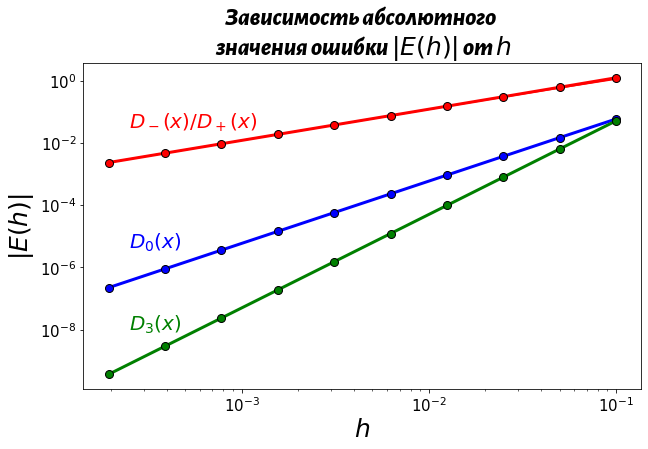

In [7]:
from numpy import linspace
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(10, 6))

ax.set_title('Зависимость абсолютного \n значения ошибки $|E(h)|$ от $h$', fontsize = 25,**{'fontname':'Alegreya Sans'}, fontweight='bold',style='italic')

plt.plot(h, error[0][:],'r')
plt.plot(h, error[1][:],'r-o', markeredgecolor='black', linewidth=3,markersize=8)
plt.plot(h, error[2][:],'b-o', markeredgecolor='black', linewidth=3,markersize=8)
plt.plot(h, error[3][:],'g-o', markeredgecolor='black', linewidth=3,markersize=8)

plt.text(0.00025, 3e-02, '$D_-(x)/D_+(x)$',fontsize = 20,color='r')
plt.text(0.00025, 4e-06, '$D_0(x)$',fontsize = 20,color='b')
plt.text(0.00025, 1e-08, '$D_3(x)$',fontsize = 20,color='g')

plt.xticks(fontsize=15)
plt.yticks(fontsize=15)

plt.xscale('log')
plt.yscale('log')

ax.set_ylabel("$|E(h)|$",fontsize = 25,**{'fontname':'Alegreya Sans'}, fontweight='bold',style='italic')
ax.set_xlabel("$h$",fontsize = 25,**{'fontname':'Alegreya Sans'}, fontweight='bold',style='italic')
plt.show()

&nbsp; Графики зависимости абсолютной ошибки от величины $h$ представляют собой линии в логарифмических координатах. Как было указано выше, ошибка получаемая при использовании разных аппроксимаций производной пропроциональна разным степеням $h$:

\begin{equation}
E(h) \approx C h^p
\label{eq:error}
\end{equation}

&nbsp; Тогда логарифмируя получим:

\begin{equation}
\mathrm{log}|E(h)| \approx \mathrm{log}|C| + p \mathrm{log} h
\label{eq:log_error}
\end{equation}

&nbsp; Таким образом, в log-log системе координат зависимость ошибки от шага представляет собой прямую, что и было продемонстировано на рисунке выше. Cтепень $p$ в $\eqref{eq:error}$ называется *порядком точности*. Вычислим порядки точности для различных аппроксимаций: 

In [8]:
from numpy import log

p_forward    = (log(error[0][1])-log(error[0][0]))/(log(h[1])-log(h[0]))
p_backward   = (log(error[1][1])-log(error[1][0]))/(log(h[1])-log(h[0]))
p_centered   = (log(error[2][1])-log(error[2][0]))/(log(h[1])-log(h[0]))
p_thirdorder = (log(error[3][1])-log(error[3][0]))/(log(h[1])-log(h[0]))
(p_forward, p_backward, p_centered, p_thirdorder)

(0.9399143241436873, 1.0121937849270617, 1.986469731783887, 2.9965116124550306)

&nbsp; Итак, для односторонних разностей $D_+(x)$ и $D_-(x)$ порядок точности $p$ составляет  соответственно 9.40e-01 и 1.01e+00. Как и предполагалось, полученные значения близки к 1. Для центральной разности $D_0(x)$ порядок точности 1.99e+00, для разности третьего порядка $D_3(x)$ порядок точности 3.00e+00.

### 2. Ошибки округления

&nbsp; В данном разделе мы обоснуем эмпирические результаты, полученные выше. Стандартным подходом к анализу ошибки конечно-разностной аппроксимации является представление функции в ряде степенного ряда Тейлора в окрестности точки $\bar x$, к примеру:
\begin{equation}
u(\bar x + h) = u(\bar x) + h u'(\bar x) + \frac{1}{2}h^2 u''(\bar x) + \frac{1}{6}h^3 u'''(\bar x) + O(h^4)
\label{eq:taylor_forward}
\end{equation}
\begin{equation}
u(\bar x - h) = u(\bar x) - h u'(\bar x) + \frac{1}{2}h^2 u''(\bar x) - \frac{1}{6}h^3 u'''(\bar x) + O(h^4)
\label{eq:taylor_backward}
\end{equation}

&nbsp; Данные разложения справедливы, в том случае если функция $u(x)$ достаточно гладкая вблизи $\bar x$. Небольшое напоминание о нотации $O(h)$ и $o(h)$ приведено в приложении второй части Лекции 1. В дальнейшем мы будем интенсивно использовать эту нотацию. 
    Используя $\eqref{eq:taylor_forward}$ можно вычислить разность $\eqref{eq:forward_diff}$:
    
\begin{equation*}
D_+u(\bar x) = \frac{u(\bar x - h) - u(\bar x)}{h} = u'(\bar x) + \frac{1}{2} h u''(\bar x) + \frac{1}{6} h^2 u'''(\bar x) + O(h^3)
\end{equation*}

&nbsp; Соответственно ошибка аппроксимации $u'(\bar x)$ равна:
\begin{equation*}
D_+u(\bar x) - u'(\bar x) = \frac{1}{2} h u''(\bar x) + \frac{1}{6} h^2 u'''(\bar x) + O(h^3)
\end{equation*}

$u''(\bar x)$, $u'''(\bar x)$ и другие значения производных в точке $\bar x$ являются константами, не зависящими от $h$. Для малых $h$ ошибка будет определяться первым слагаемым $\frac{1}{2} h u''(\bar x)$, остальные слагаемые будут меньше, так как зависят от более высоких степеней $h$. Таким образом, для $D_+u(\bar x)$ ошибка равна произведению константы на $h$, причем значение этой константы примерно равно $\frac{1}{2} h u''(\bar x)$.  

---

#### Задача 1. 
> Найдите константу $С$ в оценке абсолютной ошибки $\eqref{eq:error}$ для аппроксимации $D_+u(\bar x)$. Проверьте, соответствует ли она $\frac{1}{2} u''(\bar x)$ для функции $u(x)=\mathrm{sin}(5x)$, $\bar x = 1$ из [Примера 1](#example_1). Между полученными значениями могут быть небольшие расхождения. Почему?

---

&nbsp; Для $D_-u(\bar x)$ аналогичные выкладки на основе $\eqref{eq:taylor_backward}$ позволяют получить следующее выражение для ошибки:

\begin{equation*}
D_-u(\bar x) - u'(\bar x) = -\frac{1}{2} h u''(\bar x) + \frac{1}{6} h^2 u'''(\bar x) + O(h^3)
\end{equation*}

что также соотвествует нашим наблюдениям.

&nbsp; Складывая $\eqref{eq:taylor_forward}$ и $\eqref{eq:taylor_backward}$ получим

\begin{equation*}
u(\bar x + h) - u'(\bar x - h) = 2 h u'(\bar x) + \frac{1}{3} h^3 u'''(\bar x) + O(h^5)
\end{equation*}

откуда
\begin{equation*}
D_0u(\bar x) - u'(\bar x) = \frac{1}{6} h^2 u'''(\bar x) + O(h^4)
\end{equation*}

что подтверждает второй порядок точности формулы центральной разности. 

---

#### Задача 2.
> Используя $\eqref{eq:taylor_forward}$ и $\eqref{eq:taylor_backward}$ и разложение в ряд Тейлора для $u(\bar x + 2h)$, докажите, что формула $D_3u(\bar x)$ $\eqref{eq:thirdorder_diff}$ аппроксимирует производную функции $u(\bar x)$ с третьим порядком точности.  

---

---
**Ячейка снизу загружает стилевую конфигурацию блокнота.**

In [9]:
from IPython.core.display import HTML
def css_styling():
    styles = open("./custom.css", "r").read()
    return HTML(styles)
css_styling()